In [1]:
import pickle
from pathlib import Path
from PIL import Image
import torch
import torchvision.transforms.functional as tvf

torch.set_grad_enabled(False)

from models.library import qres34m

Initialize model and load pre-trained weights

In [2]:
model = qres34m()

msd = torch.load('checkpoints/qres34m/lmb32/last_ema.pt')['model']
model.load_state_dict(msd)

model.eval()
model.compress_mode()

Compress an RGB image

In [3]:
img = Image.open('./images/collie128.png')
im = tvf.to_tensor(img).unsqueeze_(0)
compressed_obj = model.compress(im)

Save to file, compute bit rate

In [4]:
save_path = 'results/image.bits'
with open(save_path, 'wb') as f:
    pickle.dump(compressed_obj, file=f)

total_bits = Path(save_path).stat().st_size * 8
bpp = total_bits / (im.shape[2] * im.shape[3])
print(f'Actual file size: {total_bits} bits = {bpp:.6f} bpp')


Actual file size: 24016 bits = 1.465820 bpp


Decompress and reconstruct the image

Reconstructed image:


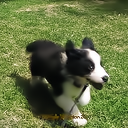

In [5]:
with open(save_path,'rb') as f:
    compressed_obj = pickle.load(file=f)

im_hat = model.decompress(compressed_obj)

print('Reconstructed image:')
tvf.to_pil_image(im_hat[0])

Original image:


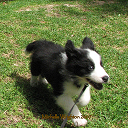

In [6]:
print('Original image:')
img